# Exercise 1: K Nearest Neighbors

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Write efficient code whenever possible. 
1. Use the documentation and Google. There are python methods and packages for most logic in this exercise. 
1. Test your code as it must run without errors. 
1. Before you sumbit the exercise, restart the notebook and run it again to make sure your code works as intended.
1. Write your own code. Cheating will not be tolerated.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw1_123456789_987654321.ipynb` if you submitted in pairs and `hw1_123456789.ipynb` if you submitted the exercise alone.


The goal of this exercise is to get you familiar with `sklearn` and the KNN model. sklearn (aka scikit learn) is a free machine learning library for the Python programming language. It features various classification, regression and clustering algorithms.

## In this exercise you will perform the folllowing:

1. Use sklearn to train a KNN classification algorithm.
2. Predict new instances using your trained model.

# Part 1: Training a KNN Classifier using sklearn (80 Points)

## Data Preprocessing

Before diving into the algorithm, we need to handle our data. We will train our KNN classifier on the MNIST dataset that includes images of the digits 0-9.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data(filename):
    data = pd.read_csv(filename, delimiter=' ', header=None).dropna(axis=1)
    X = data.drop([0], axis=1).values
    y = data[0].values
    return X, y

X, y = load_data('digit.data')

train_size = 1607
test_size  = 400
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = train_size, 
                                                    test_size = test_size, 
                                                    random_state=0)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1607, 256)
y_train shape:  (1607,)
X_test shape:  (400, 256)
y_test shape:  (400,)


We can learn that our dataset has 1,607 training examples and 400 test examples and that each image is a vector with 256 features. If we would like to visualize an instance as an image, we first need to reshape it into a 16x16 matrix. Run the cell below to see different examples in the training set.

Digit:  0


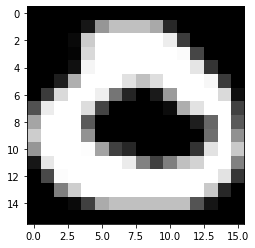

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def vec_to_img(vec):
    return vec.reshape((16, 16))

def imshow(images, labels, index):
    plt.imshow(vec_to_img(images[index]), cmap='gray', interpolation='nearest');
    print("Digit: ", labels[index])
    
random_index = np.random.randint(0, X_train.shape[0])
imshow(X_train, y_train, random_index)

## Training a classifier

1. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and understand how to train a KNN classifier. Use the default configurations for now.
2. Make sure you understand how to evaluate the performance of your model using the testing dataset [using the score method](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# This is a working example to get you started.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

1. Train 10 models with different values for `k` from 1 to 10.
2. Use the graph of the perfomance of the model as a function of `k` on both the training and testing data and explain the results.

In [6]:
train_acc = []
test_acc = []

# Train 10 models with different values for k from 1 to 10.
# Save the results of the training and testing accuracy in the 
# python lists train_acc and test_acc respectively.

##### YOUR CODE STARTS HERE ~5 lines #####
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    test_acc.append(test_score)
    train_score = knn.score(X_train, y_train)
    train_acc.append(train_score)
#####  YOUR CODE ENDS HERE  #####

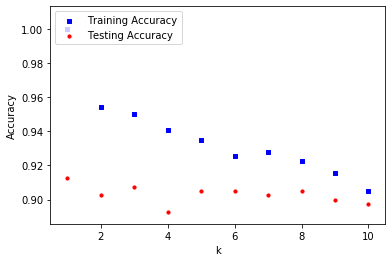

In [7]:
# This will plot the accuracies as a function of k.
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 11), train_acc, s=10, c='b', marker="s", label='Training Accuracy')
ax1.scatter(range(1, 11) ,test_acc, s=10, c='r', marker="o", label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("k")

plt.legend(loc='upper left');
plt.show()

## Q: Explain the results. What can you say about the training error as a function of k? What about the testing error? Which k do you recommend?

by looking at the chart, we can assume when k = [1,10] the test accuracy results is around 90% in addition to that we can see the connection between the accuracy and number of k when k is rising the accuracy is decreasing. i choose k = 10


Train a KNN classifier with your chosen k on 8 different training sample sizes between 10 and 100 (use the "sample_x_y" function to generate them). For each sample size, calculate the error on the full test dataset. Repeat each sample size 5 times with a different random training sample and average the measurements of the error for each size. Draw a plot of the average test error as a function of the training sample size. Dont forget to label the axes.

In [8]:
import random
def sample_x_y(x, y, sample_size):
    """ Samples sample_size matching examples from x and y """
    idx = np.random.choice(np.arange(len(x)), sample_size, replace=False)
    return x[idx], y[idx]

##### YOUR CODE STARTS HERE ~15 lines #####
sample_sizes = [10, 15, 30, 50, 55, 75, 90, 100]
avg_error_score = []

for sample_size in sample_sizes:
    error_score , total_error = 0, 0
    for i in range(1,6):
        a, b = sample_x_y(X_train, y_train, sample_size)
        knn = KNeighborsClassifier(n_neighbors=10)
        knn.fit(a, b)
        error_score = 1 - knn.score(X_test, y_test)
        total_error += error_score
    avg_error_score.append(error_score / 5)
#####  YOUR CODE ENDS HERE  #####

Draw a plot of the average test error as a function of the training sample size. Dont forget to label the axes.

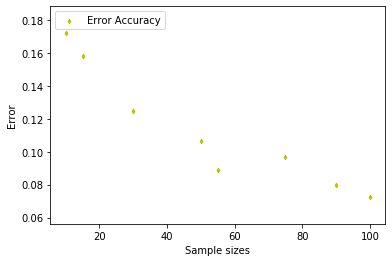

In [12]:
##### YOUR CODE STARTS HERE ~10 lines #####
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(sample_sizes, avg_error_score, s=10, c='y', marker="d", label='Error Accuracy')
ax1.set_ylabel("Error")
ax1.set_xlabel("Sample sizes")

plt.legend(loc='upper left');
plt.show()
#####  YOUR CODE ENDS HERE  #####

## Q: Did you get different results in different runs with the same sample size? Why?

A: The reason for the different results in the different runs is because every single time we are using the sampled method we are using the radnom method this causing the model to learn from a different train set every time. the result of this method are the different outputs.

## Q Do you observe a trend in the graph? Do you think adding more data to the full training set will improve the classifier performance? Explain.

A: in my opinion the trend we can observe from the plot is while the train size is getting bigger the model accuracy is raising but we can see eventually the accuracy is getting to a celinig point that it cant push it higher.

Train a KNN classifier with your chosen k on the whole training set. For the output of this run, provide a **[confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)**: a table where each column and each row correspond to one of the digits, and the value in each cell (digit1, digit2) is the number of images in the **test set** that are actually digit1, and were predicted by the algorithm to be digit2. The main diagonal is the correct predictions for each digits. 

In [ ]:
from sklearn.metrics import confusion_matrix

##### YOUR CODE STARTS HERE ~5 lines #####
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
#####  YOUR CODE ENDS HERE  #####

## Q: What are the 3 highest off-diagonal values in the confusion matrix? Can you explain the reason they are there?

A: The 3 highest values are the prediction of 8 as 3 and also the number 0 as 2 and 4 as 1. im assuming the model got confused by the resemblance of the numbers in example 3 looks like a half 8 so the model didnt learn yet that 3 stand for himself

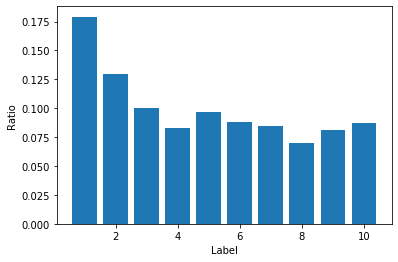

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

counts = pd.Series(y_train).value_counts(normalize=True).sort_index()
ax1.bar(range(1, 11), counts)
ax1.set_ylabel("Ratio")
ax1.set_xlabel("Label")

plt.show()

## Q: Above is the distritbution of the labels in the training set. Can this information further explain some of the off-diagonal values in the confusion matrix? How?

A: The most common number in the training set is 0 also at the confusion matrix we can understand that by the uniqe look of digit none of the digits look like 0. but because 0 is the most common digit that the model can figure out when the model cant recognize the digit it will assume the digit is 0.

## Q2 (20 Points)

Consider a distribution over rabbits and food preference. Each rabbit likes either carrot or lettuce.
For each rabbit, we measure their weight in kg and their age in months. In principle, a rabbit can live
until age 48 months and weigh as much as 4kg.

In [14]:
data = [[7,  1, 'carrot', 0],
        [7,  1, 'lettuce', 0.1],
        [7,  2, 'carrot', 0],
        [7,  2, 'lettuce', 0.5],
        [13, 1, 'carrot', 0.15],
        [13, 1, 'lettuce', 0],
        [13, 2, 'carrot', 0],
        [13, 2, 'lettuce', 0.25]]

columns = ['age', 'weight', 'food', 'probability']
df = pd.DataFrame(data, columns=columns)
df

,age,weight,food,probability
0,7,1,carrot,0.00
1,7,1,lettuce,0.10
2,7,2,carrot,0.00
3,7,2,lettuce,0.50
4,13,1,carrot,0.15
5,13,1,lettuce,0.00
6,13,2,carrot,0.00
7,13,2,lettuce,0.25


### 1. What are $\mathcal{X}$ and $\mathcal{Y}$ in this problem?

### 2. We have a distribution $D$ over rabbits with the following probabilities (all other values have zero probability). What is the best predictior $\hat{h}$ for the distribution $D$? Write the value of the predictor $\hat{h}(x)$ for each possible $x$ with non-zero probability in the distribution. What is the expected error of $\hat{h}$ on $D$?

### 3. Now assume the weight is unavailable to us, what is the new distribution $D'$? What is the minimal error possible to achieve for this distribution?

A: 

1. Y - Food Preference,  X - Rabbits
   
2. Best predictior $\hat{h}$ for D is: if age = 7 --> Lettuce | if age = 13 & weight = 1 --> Carrot | if age = 13 & weight = 2 --> Lettuce

3. New D is: (if age = 7 --> Lettuce | if age = 13 --> Lettuce) & error is 0.15

